In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [5]:
base_dir = '../data/MagnaTagATune/'
annotation_fn = 'annotations_final.csv'
annotation_path = base_dir + annotation_fn
annotation_out_fn = 'annotation_reduced.csv'
annotation_out_path = base_dir + annotation_out_fn

annotations = pd.read_csv(annotation_path, sep='\t')

In [6]:
print("Len before removing wrong songs:{}".format(len(annotations)))
to_be_removed = ["6/norine_braun-now_and_zen-08-gently-117-146.mp3", 
                 "8/jacob_heringman-josquin_des_prez_lute_settings-19-gintzler__pater_noster-204-233.mp3",
                 "9/american_baroque-dances_and_suites_of_rameau_and_couperin-25-le_petit_rien_xiveme_ordre_couperin-88-117.mp3"]

annotations = annotations.drop(index = annotations.loc[annotations['mp3_path'].isin(to_be_removed)].index)\
                                                                                        .reset_index(drop=True)
print("Len after removing wrong songs:{}".format(len(annotations)))

Len before removing wrong songs:25863
Len after removing wrong songs:25860


In [7]:
synonyms = [['drum','beat', 'beats','drums'],['chant', 'chanting'],['choir', 'choral'],
                ['classical', 'clasical', 'classic'],
                ['electro', 'electronic', 'electronica', 'electric'],
                ['fast', 'fast beat', 'quick'],
                ['female', 'female singer', 'female singing', 'female vocals','female vocal','female voice', 'woman', 'woman singing', 'women'],
                ['flute', 'flutes'],['guitar', 'guitars'],['hard', 'hard rock'],['harpsichord', 'harpsicord'],
                ['heavy', 'heavy metal', 'metal'],['horn', 'horns'],['india', 'indian'],['jazz', 'jazzy'],
                ['male', 'male singer', 'male vocal', 'male vocals', 'male voice', 'man', 'man singing', 'men'],
                ['opera', 'operatic'],['orchestra', 'orchestral'],['quiet', 'silence'],['singer', 'singing'],
                ['space', 'spacey'],['string', 'strings'],['synth', 'synthesizer'],['violin', 'violins'],
                ['vocal', 'vocals', 'voice', 'voices'],['strange', 'weird']]

non_relevant_tags = ['no flute', 'no guitar', 'no piano','no strings', 
                     'no violin','not classical', 'not english','not opera', 
                     'not rock','no beat', 'no singer','no drums', 'no singing',
                     'no vocal', 'no vocals', 'no voice', 'no voices']

annotations.drop(columns=non_relevant_tags, inplace=True)

#each tag is mapped to the first synonym
renaming_map = {}
for row in synonyms:
    ref = row[0]
    for syn in row:
        if syn != ref:
            renaming_map[syn] = ref

In [8]:
#rename and merge synonym columns
annotations.rename(columns=renaming_map, inplace=True)
annotations = annotations.groupby(lambda x:x, axis=1).sum()
annotations = annotations.applymap(lambda x: 1 if type(x)==int and x>=1 else x)
print("After merge: {}".format(len(annotations.columns.values)))

After merge: 125


In [9]:
n = 40
top_n = (annotations.drop(['clip_id', 'mp3_path'], axis=1)
               .sum()
               .sort_values()
               .tail(n)
               .index
               .tolist())

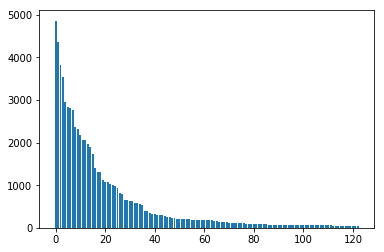

In [10]:
# plot 
plt.bar(range(len(annotations.columns.values)-2),list(annotations.drop(['clip_id','mp3_path'],axis=1)
                                                      .sum(axis=0).sort_values(ascending=False)))
plt.show()

In [11]:
total_tag_instances = annotations.drop(['clip_id','mp3_path'],axis=1).sum(axis=0).sum()
total_tag_instances_top_n = annotations[top_n].sum(axis=0).sum()
print("Coverage: {}".format(total_tag_instances_top_n/total_tag_instances))

Coverage: 0.8636246455271978


In [12]:
final_annotations = annotations[top_n + ['mp3_path']] 
final_annotations.to_csv(path_or_buf=annotation_out_path, sep='\t')